In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#设置绘图大小
plt.style.use({'figure.figsize':(25,20)}) # 给画的图指定大小, 长25, 宽20
#这两个用来显示中文字符
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [3]:

#导入文件
df_english= pd.read_csv(r"C:\Users\26477\Desktop\boston\1.csv", encoding='latin1')

df_english.head()
df_english.shape
df_english.info()#查看是否有缺失值
df_english.describe()#方差，平均值等
df_english.corr()#相关性系数


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   samplea                       8 non-null      object 
 1   C?content?(mg?g¨C1)           7 non-null      object 
 2   Fe?content?(mg?g¨C1)          7 non-null      object 
 3   SSA?(m2?g¨C1)                 8 non-null      object 
 4   qe mg g ?1                    7 non-null      float64
 5   k (¡Á10-3 ) g mg ?1 minute?1  7 non-null      float64
 6   R 2                           7 non-null      float64
 7   RSS                           7 non-null      float64
dtypes: float64(4), object(4)
memory usage: 640.0+ bytes


C:\Users\26477\AppData\Local\Temp\ipykernel_6372\1412829369.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_english.corr()#相关性系数


,qe mg g ?1,k (¡Á10-3 ) g mg ?1 minute?1,R 2,RSS
qe mg g ?1,1.000000,-0.776910,NaN,0.945669
k (¡Á10-3 ) g mg ?1 minute?1,-0.776910,1.000000,NaN,-0.820387
R 2,NaN,NaN,NaN,NaN
RSS,0.945669,-0.820387,NaN,1.000000


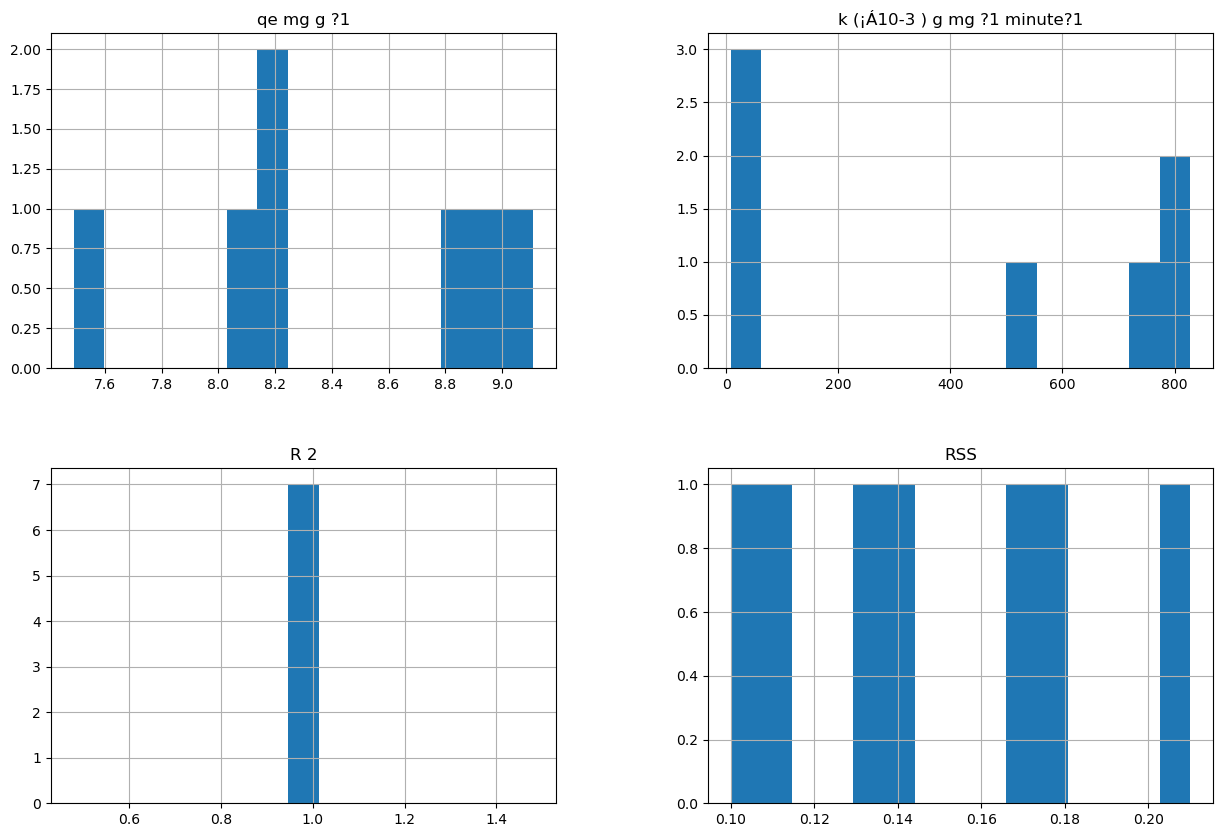

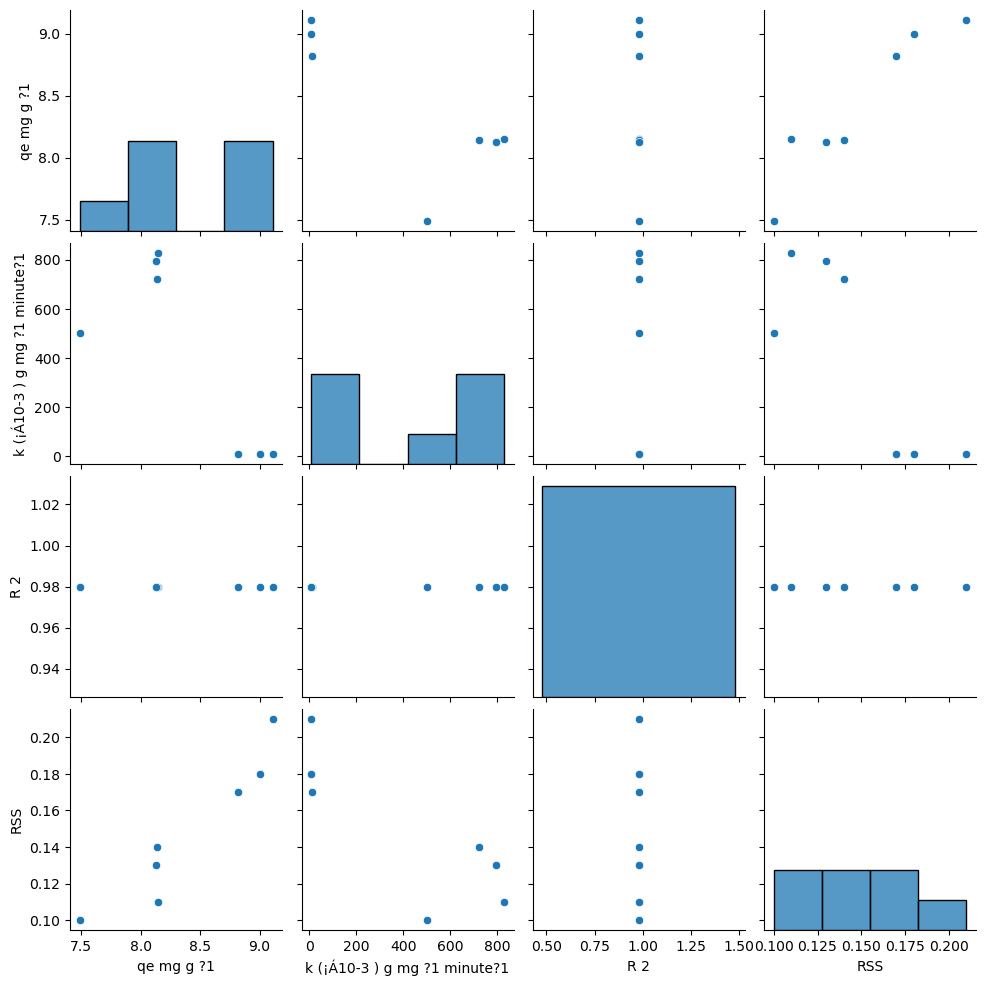

In [4]:
#数据可视化
# 设置绘图大小
plt.style.use({'figure.figsize':(15,10)})
df_english.hist(bins=15) # 画出直方图, 15表示分为15个区段 
sns.pairplot(df_english)

Text(0.5, 1.0, '1')

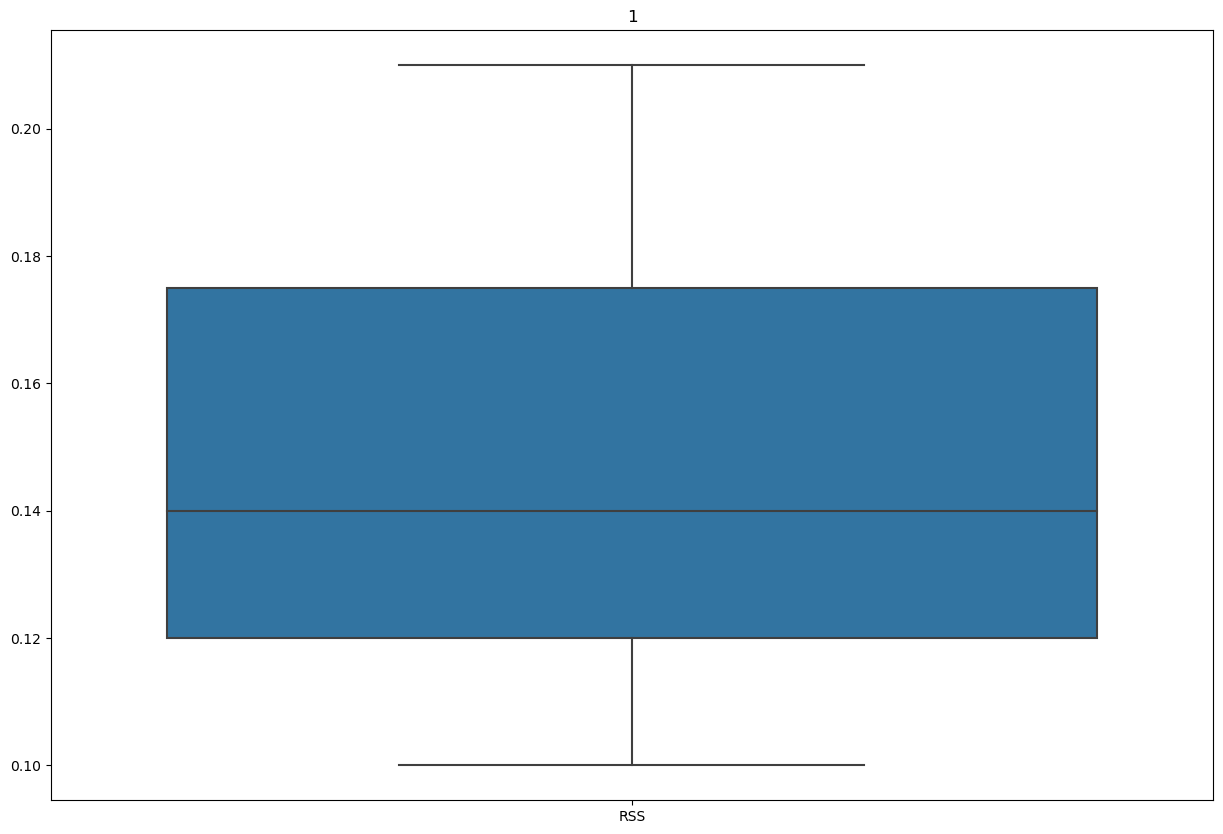

In [5]:
sns.boxplot(data=df_english[['RSS']])
plt.title('1')

C:\Users\26477\AppData\Local\Temp\ipykernel_6372\1110858037.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_english.corr(),square=True,annot=True,cmap='YlGnBu') # 热力图  14个特征中两两变量之间的皮尔森相关系数


<Axes: >

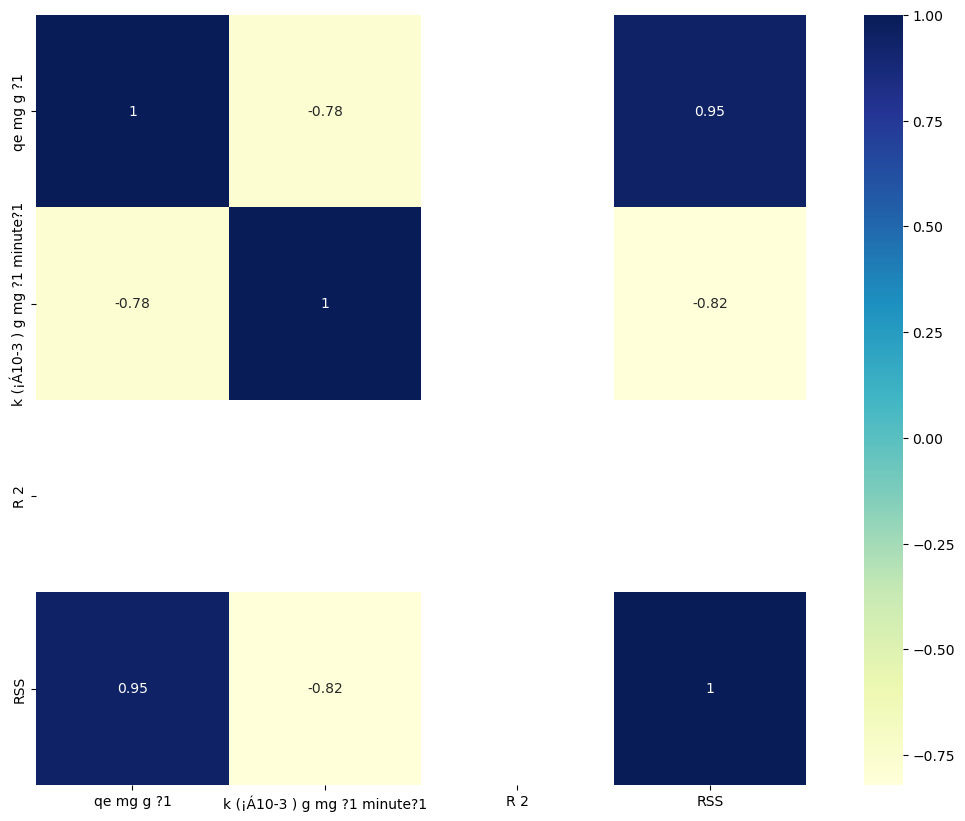

In [6]:
sns.heatmap(df_english.corr(),square=True,annot=True,cmap='YlGnBu') # 热力图  14个特征中两两变量之间的皮尔森相关系数

In [7]:
df_english.head()

,samplea,C?content?(mg?g¨C1),Fe?content?(mg?g¨C1),SSA?(m2?g¨C1),qe mg g ?1,k (¡Á10-3 ) g mg ?1 minute?1,R 2,RSS
0,ferrihydrite,NaN,563.5?(3.2),301.7?(4.2),7.49,502.0,0.98,0.10
1,humic acid,331.4?(0.2),NaN,0.2?(0.0),NaN,NaN,NaN,NaN
2,FhHA_Adsr0.5%,5.1?(0.1),510.4?(2.1),294.3?(2.1),8.82,9.8,0.98,0.17
3,FhHA_Adsr5%,39.3?(0.2),450.5?(1.2),249.2?(3.2),9.00,9.0,0.98,0.18
4,FhHA_Adsr15%,135.5?(0.2),344.8?(1.1),184.3?(3.1),9.11,8.3,0.98,0.21


In [9]:
# 构造训练数据集的特征
drop_columns = ['qe mg g ?1']
x = df_english.drop(drop_columns,axis=1)
x.head

<bound method NDFrame.head of          samplea C?content?(mg?g¨C1) Fe?content?(mg?g¨C1) SSA?(m2?g¨C1)  \
0   ferrihydrite                 NaN          563.5?(3.2)   301.7?(4.2)   
1     humic acid         331.4?(0.2)                  NaN     0.2?(0.0)   
2  FhHA_Adsr0.5%           5.1?(0.1)          510.4?(2.1)   294.3?(2.1)   
3    FhHA_Adsr5%          39.3?(0.2)          450.5?(1.2)   249.2?(3.2)   
4   FhHA_Adsr15%         135.5?(0.2)          344.8?(1.1)   184.3?(3.1)   
5   FhHA_Cor0.5%           5.2?(0.1)          518.3?(0.9)   231.4?(2.0)   
6     FhHA_Cor5%          45.7?(0.2)          471.6?(0.9)   196.7?(2.4)   
7    FhHA_Cor15%         171.9?(0.2)          282.1?(1.3)     0.2?(0.0)   

   k (¡Á10-3 ) g mg ?1 minute?1   R 2   RSS  
0                         502.0  0.98  0.10  
1                           NaN   NaN   NaN  
2                           9.8  0.98  0.17  
3                           9.0  0.98  0.18  
4                           8.3  0.98  0.21  
5                 